This example firstly set up a physical background condition with Jupiter and Saturn orbiting around the Sun.

Then we add 2 embryo particles with calculated initial status according to the hypothesis, whose mass are $30M_{\oplus}$ respectively.

After that we, considering the collision and merger, integrate the system for a preinstall long time units and plot the figure.

In [11]:
import rebound
import numpy as np
import random
sim = rebound.Simulation()

# Collisions
sim.collision = "direct"
sim.collision_resolve = "merge"

# Integrator Options
sim.integrator = "mercurius"
sim.dt = 0.0001*2.*np.pi

# Boundary condition
sim.configure_box(100.)   # confine the simulation to a box of size 100
sim.boundary = "open"

# Simulation Time
tmax = 1e3*2.*np.pi

#np.random.seed(12)

In [12]:
# Massive Bodies
sim.add(hash = "sun", m = 1., r = 0.005)
a_jupiter = 3.5 # Au
a_saturn = 4.58 # Au
sim.add(hash = "jupiter", m = 0.0009547919152112404, a = a_jupiter, r = 0.00046733)
sim.add(hash = "saturn", m = 0.0002858856727222417, a = a_saturn, r = 0.00038926)

# sim.N_active = sim.N

In [13]:
# Embryos
# 行星胚胎群总距离 a = 10 AU
n_embryos = 2
e = random.randint(1,10)*0.001*np.pi/180
inc = random.randint(1,10)*0.001*np.pi/180
Omega = random.randint(0,360)*np.pi/180
omega = random.randint(0,360)*np.pi/180
m = 30*3.040432648022642e-06
rho = 3
r = (((m*1.988e33)/(4*np.pi))**(1/3))/1.4960e13
a_default = 10 # AU
hillradii = a_default * (1 - e) * (m/(3*1))**(1/3)

for i in xrange(0, n_embryos):
    rand = np.random.random()*2*np.pi
    a = i * 0.7 * hillradii + 10 - (5 * hillradii)
    sim.add(m = m, r = r, a = a, e = e, inc = inc, Omega = Omega, omega = omega, f = rand)
   # sim.particles[i+3].lastcollision = 0

In [14]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	5
Selected integrator: 	mercurius
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7f2797a5b620, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7f2797a5ba60, m=0.0009547919152112404 x=3.5 y=0.0 z=0.0 vx=0.0 vy=0.534777601816256 vz=0.0>
<rebound.particle.Particle object at 0x7f2797a5b620, m=0.0002858856727222417 x=4.58333858405018 y=0.0 z=0.0 vx=0.0 vy=0.46806920322445394 vz=0.0>
<rebound.particle.Particle object at 0x7f2797a5ba60, m=9.121297944067926e-05 x=-8.239195781087327 y=-1.8046749318495743 z=0.00013198833214900097 vx=0.07364350864549907 vy=-0.33586518498484585 vz=-2.667994576648493e-06>
<rebound.particle.Particle object at 0x7f2797a5b620, m=9.121297944067926e-05 x=-4.481825910440289 y=-7.40559816583936 z=4.47088512446

In [15]:
for i in range(0, 3+n_embryos):
    print(sim.particles[i].m)

1.0
0.0009547919152112404
0.0002858856727222417
9.121297944067926e-05
9.121297944067926e-05


In [16]:
sim.move_to_com()
E0 = sim.calculate_energy()

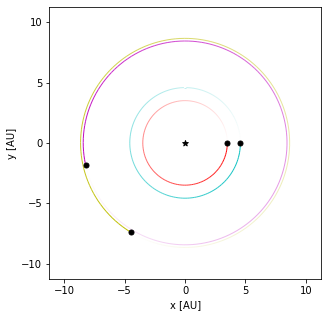

In [17]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, Narc=300)

In [18]:
sim.getWidget(size=(500,300),scale=2.0*a_saturn)

Widget(N=5, count=2, height=300.0, orbit_data=b'\xc4\x82d\xbb\xcd\xe9[:v?\x8a\xb2\x00\x00`@M\xc9_%\xdb\x0fI@\x…

In [19]:
sim.integrate(tmax)
dE = abs((sim.calculate_energy() - E0)/E0)
print(dE)

1.389481938210746e-12


In [20]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	5
Selected integrator: 	mercurius
Simulation time:     	6.2831853071795858e+03
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7f2797a238c8, m=1.0 x=-0.0016656712580697425 y=0.00237907457392307 z=3.766363840521236e-09 vx=-0.0004650695445918621 vy=-0.0001257951229328815 vz=-5.892413353500864e-10>
<rebound.particle.Particle object at 0x7f2797a23d90, m=0.0009547919152112404 x=-0.18620336055451422 y=-3.4658345709345286 z=8.303717744881373e-07 vx=0.5368430678663656 vy=-0.026107671185750737 vz=-1.1361828512259527e-08>
<rebound.particle.Particle object at 0x7f2797a238c8, m=0.0002858856727222417 x=4.647057311714682 y=0.4729624501412008 z=-1.2194339753407944e-06 vx=-0.053151755810699905 vy=0.4575292123883486 vz=-1.5815067866489283e-07>
<rebound.particle.Particle object at 0x7f2797a23d90, m=9.121297944067926e-05 x=